# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
from datetime import date
import re 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('main_task.csv')

In [3]:
RANDOM_SEED = 42
CURRENT_DATE = '11/30/2020'

!pip freeze > requirements.txt

In [4]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [5]:
# Вынесем информацию о наличии пропуска как отдельный признак и заполним пропуски медианным значением
data['Number of Reviews Was NAN'] = data['Number of Reviews'].isna()
data['Number of Reviews'] = data['Number of Reviews'].fillna(
    data['Number of Reviews'].mean())

In [6]:
# Так же вынесем информацию о пропусках и заменим пропущенные значения
data['Cuisine Style Was NAN'] = data['Cuisine Style'].isna()
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Unknown']")
# Обработаем значения и посчитаем количество кухонь представленных в ресторане
data['Number of Styles'] = data['Cuisine Style'].str[2:-2].str.split("', '")
data['Number of Styles'] = data['Number of Styles'].apply(lambda x: 0 if x is np.nan else len(x))

##  Посмотрим, какую информцию можно получить из городов

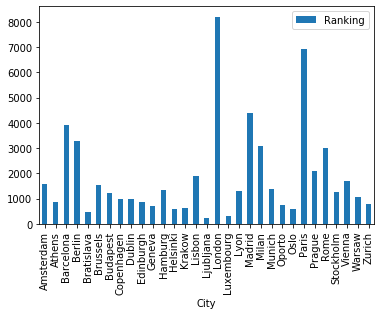

In [7]:
# Рассмотрим распределение ранга ресторанов по городам:
data.pivot_table(values = ['Ranking'], 
               index = 'City', 
               aggfunc = 'mean').plot(kind = 'bar')

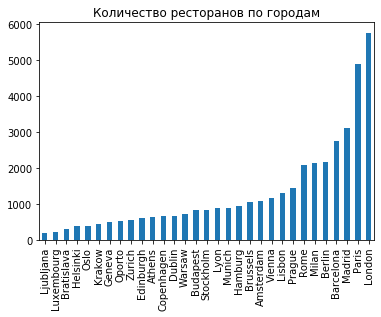

In [8]:
#Так же количество ресторанов по городам:
data['City'].value_counts(ascending=True).plot(kind='bar', title='Количество ресторанов по городам')

In [9]:
# Логично будет создать новый признак - количество ресторанов в одном городе
rest_count = data.groupby('City')['Restaurant_id'].count().to_dict()
data['Restaurants in City'] = data['City'].map(rest_count)

In [10]:
# На основе нового признака можно получить условный рейнтиг города по ресторанам
data['City ranking'] = data['Ranking'] / data['Restaurants in City']

In [11]:
# Создадим новый признак на основе того, является ли город столицей
city_list = [
    'London',
    'Paris', 
    'Madrid', 
    'Berlin', 
    'Rome', 
    'Prague', 
    'Lisbon', 
    'Vienna', 
    'Amsterdam', 
    'Stockholm', 
    'Budapest', 
    'Warsaw', 
    'Dublin', 
    'Copenhagen', 
    'Athens', 
    'Oslo', 
    'Luxembourg', 
    'Helsinki', 
    'Bratislava', 
    'Ljubljana', 
    'Brussels'
]
data['Capital'] = data['City'].apply(lambda x: 1 if x in city_list else 0)

In [12]:
# На основании города так же можем извлечь и страну
# Присвоим каждому городу код страны
countries = {
    'London': 'GB',
    'Paris': 'FR',
    'Madrid': 'ES',
    'Barcelona': 'ES',
    'Berlin': 'DE',
    'Milan': 'IT',
    'Rome': 'IT',
    'Prague': 'CZ',
    'Lisbon': 'PT',
    'Vienna': 'AT',
    'Amsterdam': 'NL',
    'Brussels': 'BE',
    'Hamburg': 'DE',
    'Munich': 'DE',
    'Lyon': 'FR',
    'Stockholm': 'SE',
    'Budapest': 'HU',
    'Warsaw': 'PL',
    'Dublin': 'IE',
    'Copenhagen': 'DK',
    'Athens': 'GR',
    'Edinburgh': 'GB',
    'Zurich': 'CH',
    'Oporto': 'PT',
    'Geneva': 'CH',
    'Krakow': 'PL',
    'Oslo': 'NO',
    'Helsinki': 'FI',
    'Bratislava': 'SK',
    'Luxembourg': 'LU',
    'Ljubljana': 'SI',
}

data['Country'] = data['City'].map(countries)
# и закодируем
countries_le = LabelEncoder()
countries_le.fit(data['Country'])
data['Country Code'] = countries_le.transform(data['Country'])

In [13]:
cities_le = LabelEncoder()
cities_le.fit(data['City'])
data['City Code'] = cities_le.transform(data['City'])

In [14]:
# Добавим новые признаки извне, например, население городов
populations = {
    'London': 8567000, 
    'Paris':  9904000, 
    'Madrid':  5567000,
    'Barcelona':  4920000,
    'Berlin':  3406000,
    'Milan':  2945000,
    'Rome':  3339000,
    'Prague':  1162000,
    'Lisbon':  2812000,
    'Vienna':  2400000,
    'Amsterdam':  1031000,
    'Brussels':  1743000,
    'Hamburg':  1757000,
    'Munich':  1275000,
    'Lyon':  1423000,
    'Stockholm':  1264000,
    'Budapest':  1679000,
    'Warsaw':  1707000,
    'Dublin':  1059000,
    'Copenhagen':  1085000,
    'Athens':  3242000,
    'Edinburgh':  504966,
    'Zurich':  1108000,
    'Oporto':  1337000,
    'Geneva':  1240000,
    'Krakow':  756000,
    'Oslo':  835000,
    'Helsinki':  1115000,
    'Bratislava':  423737,
    'Luxembourg':  107260,
    'Ljubljana':  314807,
}


data['Population'] = data['City'].map(populations)

In [15]:
# Так же можем добавить и количество ВВП на душу
economies = {
    'GB' : 46870,
    'FR' : 45893,
    'ES' : 41998, 
    'DE' : 53449, 
    'IT' : 40923,
    'CZ' : 39511,  
    'PT' : 33211,
    'AT' : 52813,
    'HU' : 33033,
    'NL' : 58095, 
    'BE' : 49912,
    'SE' : 54666,  
    'PL' : 33072,
    'IE' : 83001,
    'DK' : 52279, 
    'GR' : 30501,  
    'CH' : 65077, 
    'NO' : 76243, 
    'FI' : 48098, 
    'SK' : 36878, 
    'LU' : 113550, 
    'SI' : 38343
}

data['Economy'] = data['Country'].map(economies)
data

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Cuisine Style Was NAN,Number of Styles,Restaurants in City,City ranking,Capital,Country,Country Code,City Code,Population,Economy
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,False,3,4897,1.137431,1,FR,8,24,9904000,45893
1,id_1535,Stockholm,['Unknown'],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,True,1,820,1.874390,1,SE,19,27,1264000,54666
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,False,7,5757,0.061317,1,GB,9,16,8567000,46870
3,id_3456,Berlin,['Unknown'],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,True,1,2155,1.604640,1,DE,4,3,3406000,53449
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,False,3,893,0.695409,0,DE,4,21,1275000,53449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,...,False,4,2133,0.234412,0,IT,13,20,2945000,40923
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,...,False,5,4897,1.294874,1,FR,8,24,9904000,45893
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,...,False,2,820,2.014634,1,SE,19,27,1264000,54666
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,...,False,5,727,0.881706,1,PL,17,29,1707000,33072


# Price

In [16]:
# Как видно выше большинство ресторанов имеют значение цены "$$ -$$$", 
# заменим символы на цифры и пропущенные значения на 2
data['Price Range'] = data['Price Range'].map({'$':1,'$$ - $$$':2,'$$$$':3}).fillna(2)

# Number of Reviews

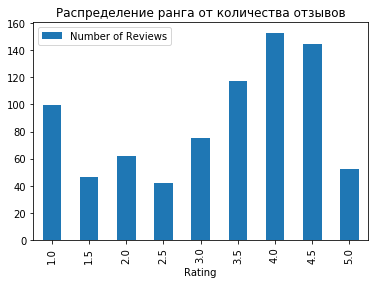

In [17]:
#Посмотрим распределение ранга от количества отзывов:
data.pivot_table(values = ['Number of Reviews'], 
               index = 'Rating', 
               aggfunc = 'mean').plot(kind = 'bar', title='Распределение ранга от количества отзывов');

In [18]:
# Создадим признак - количество отзывов о ресторанах в городе:
rev_count = data.groupby('City')['Number of Reviews'].sum().sort_values().to_dict()
data['Rev in City'] = data['City'].map(rev_count)

In [19]:
# Создадим новый признак на основании соотношения количества отзывов к рейтингу
data['Rev +-'] = data['Number of Reviews']/data['Ranking']
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Restaurants in City,City ranking,Capital,Country,Country Code,City Code,Population,Economy,Rev in City,Rev +-
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,4897,1.137431,1,FR,8,24,9904000,45893,589404.907494,0.034829
1,id_1535,Stockholm,['Unknown'],1537.0,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,820,1.874390,1,SE,19,27,1264000,54666,66814.179753,0.006506
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,5757,0.061317,1,GB,9,16,8567000,46870,789703.092479,1.949008
3,id_3456,Berlin,['Unknown'],3458.0,5.0,2.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,2155,1.604640,1,DE,4,3,3406000,53449,155250.397896,0.000868
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,893,0.695409,0,DE,4,21,1275000,53449,75414.656192,0.135266


# Reviews

In [20]:
# очистим данные
data['Review Date'] = data['Reviews'].str[2:-2].str.split("\], \[").str[1].replace('\'', '', regex=True)
# Создадим призна, указывающий был ли написан отзыв
data['Is Reviewed'] = data['Review Date'].apply(lambda x: 0 if x == '' else 1)

In [21]:
# Заполняем пропущенные значения и деаем списки из дат
data['Review Date'] = data['Review Date'].replace('', np.nan)
data['Review Date'] = data['Review Date'].str.split(", ")

In [22]:
# Создаем два новых атрибута - количество дней между отзывами 
# и количество дней с момента последнего отзыва
def datediff (dateslist):
    return abs(max( [dt.strptime(d, '%m/%d/%Y') for d in dateslist]) 
               - min( [dt.strptime(d, '%m/%d/%Y') for d in dateslist])).days

def dayspassed (dateslist):
    return abs(max( [dt.strptime(d, '%m/%d/%Y') for d in dateslist])
              - dt.strptime(CURRENT_DATE, '%m/%d/%Y')).days
    
data['Days Between'] = data['Review Date'][~data['Review Date'].isna()].apply(lambda d: datediff(d))
data['Days Since'] = data['Review Date'][~data['Review Date'].isna()].apply(lambda d: dayspassed(d))

In [23]:
# заполняем пустые значния 0, так как можно считать, 
# что если отзыва нет, то человек просто поставил оценку ресторану
data['Days Between'] = data['Days Between'].fillna(0)
data['Days Since'] = data['Days Since'].fillna(0)

In [24]:
# очистим этот признак
data['Numeric ID'] = data['ID_TA'].apply(lambda id_ta: int(id_ta[1:]))

# Рассмотрим корреляцию признаков

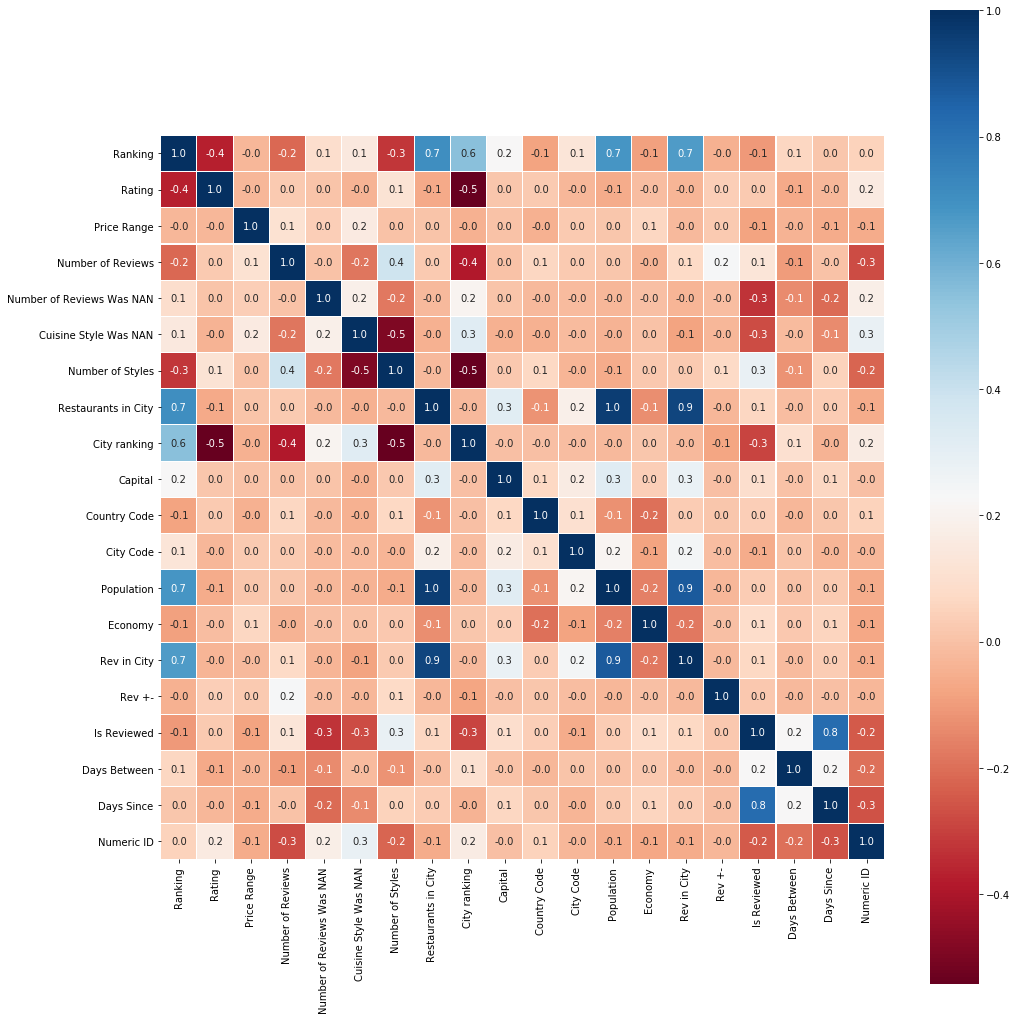

In [25]:
plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(data.corr(), square=True,
            annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");
plt.tight_layout()

# Создание dummy-переменных

In [26]:
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [27]:
styles = data['Cuisine Style'].str[2:-2].str.split("', '").apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
data = data.join(styles)

# Исключаем object столбцы из датафрейма

In [28]:
data =  data.drop(['Cuisine Style', 'Country','Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'Review Date', 'Cuisine Style Was NAN'], axis=1)
data

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,Number of Reviews Was NAN,Number of Styles,Restaurants in City,City ranking,Capital,...,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian
0,id_5569,5570.0,3.5,2.0,194.0,False,3,4897,1.137431,1,...,0,0,0,0,0,0,0,0,0,0
1,id_1535,1537.0,4.0,2.0,10.0,False,1,820,1.874390,1,...,0,0,0,0,0,0,0,0,0,0
2,id_352,353.0,4.5,3.0,688.0,False,7,5757,0.061317,1,...,0,0,0,0,0,0,0,0,0,0
3,id_3456,3458.0,5.0,2.0,3.0,False,1,2155,1.604640,1,...,0,0,0,0,0,0,0,0,0,0
4,id_615,621.0,4.0,2.0,84.0,False,3,893,0.695409,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,500.0,4.5,2.0,79.0,False,4,2133,0.234412,0,...,0,0,0,0,0,0,0,0,0,0
39996,id_6340,6341.0,3.5,2.0,542.0,False,5,4897,1.294874,1,...,0,0,0,0,0,0,0,0,0,0
39997,id_1649,1652.0,4.5,2.0,4.0,False,2,820,2.014634,1,...,0,0,0,0,0,0,0,0,0,0
39998,id_640,641.0,4.0,2.0,70.0,False,5,727,0.881706,1,...,0,0,0,0,0,0,0,0,0,0


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [29]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = data.drop(['Restaurant_id', 'Rating'], axis = 1)
y = data['Rating']

In [30]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [31]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [32]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [33]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [34]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2020985


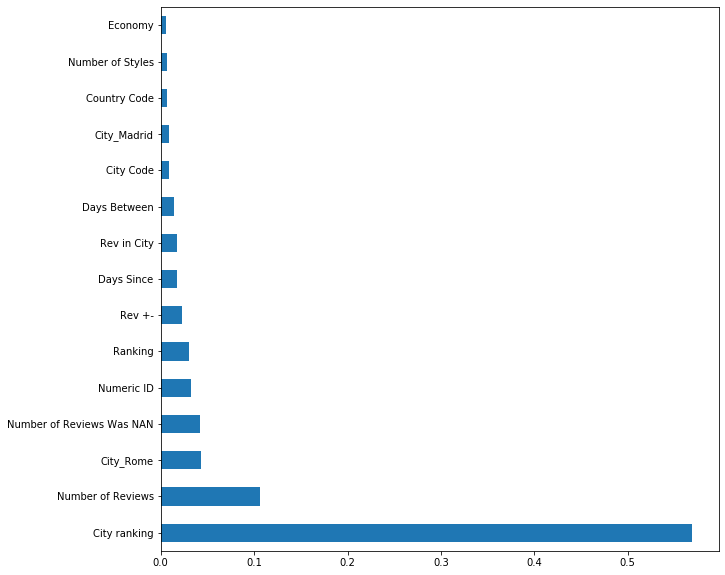

In [35]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')